<a href="https://colab.research.google.com/github/nandhukumar86/AIML-Practice/blob/master/PCA_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Basic Imports

In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline



In [105]:
import sklearn.datasets as datasets

In [106]:
from sklearn import datasets as ds

In [107]:
from sklearn.datasets import load_iris

In [108]:
X = load_iris()

In [109]:
df = pd.DataFrame(X.data, columns = X.feature_names)

In [110]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df = scaler.fit_transform(df)

In [165]:
from sklearn.decomposition import PCA

# if n_components=2 is replace by x = (0,1) then percentage of variance will be considered to reduce the features.
model = PCA(2)

reduced_array = model.fit_transform(df)

In [113]:
df = pd.DataFrame(reduced_array, columns=['PC1','PC2'])

In [114]:
df.head()

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [115]:
from sklearn.model_selection import GridSearchCV 
from sklearn import svm

space = dict()
space['C'] = [0.1, 1, 10, 100, 1000]
space['gamma'] = [1, 0.1, 0.01, 0.001, 0.0001]
space['kernel'] = ['rbf','linear','sigmoid']

model = GridSearchCV(svm.SVC(), param_grid = space)

In [116]:
model.fit(df, X.target)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [117]:
y_predict = model.predict(df)

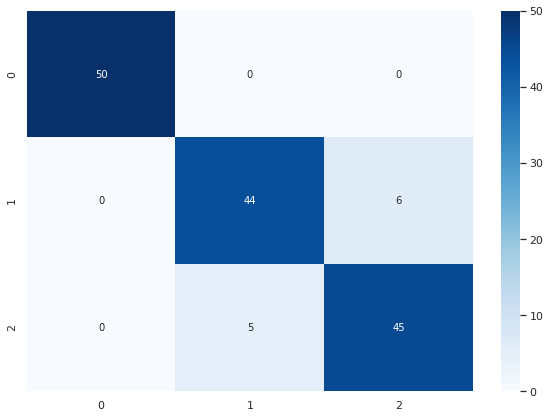

In [158]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(X.target, y_predict)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')


In [119]:
df['y_predict'] = y_predict

In [120]:
df.head()

,PC1,PC2,y_predict
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


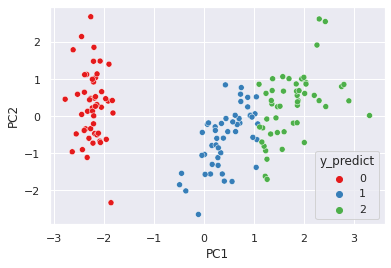

In [164]:
sns.set_palette("husl")
sns.scatterplot(x = 'PC1', y = 'PC2', hue='y_predict', data = df, palette='Set1')